# DecisionTreeClassifier with Pruning 

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("bill_authentication.csv")
df.head(5)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df["Class"].value_counts()

0    762
1    610
Name: Class, dtype: int64

In [5]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
predict=DT.predict(X_test)

[Text(478.65099158653845, 520.95, 'Variance <= 5.161\ngini = 0.495\nsamples = 919\nvalue = [505, 414]'),
 Text(198.10006009615384, 475.65000000000003, 'Skewness <= -0.027\ngini = 0.473\nsamples = 629\nvalue = [242, 387]'),
 Text(69.75, 430.35, 'Curtosis <= 0.851\ngini = 0.121\nsamples = 185\nvalue = [12, 173]'),
 Text(42.92307692307692, 385.05, 'Curtosis <= 0.266\ngini = 0.045\nsamples = 172\nvalue = [4, 168]'),
 Text(21.46153846153846, 339.75, 'Variance <= 4.319\ngini = 0.013\nsamples = 150\nvalue = [1, 149]'),
 Text(10.73076923076923, 294.45, 'gini = 0.0\nsamples = 137\nvalue = [0, 137]'),
 Text(32.19230769230769, 294.45, 'Curtosis <= -2.494\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(21.46153846153846, 249.14999999999998, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(42.92307692307692, 249.14999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(64.38461538461539, 339.75, 'Variance <= 2.126\ngini = 0.236\nsamples = 22\nvalue = [3, 19]'),
 Text(53.65384615384

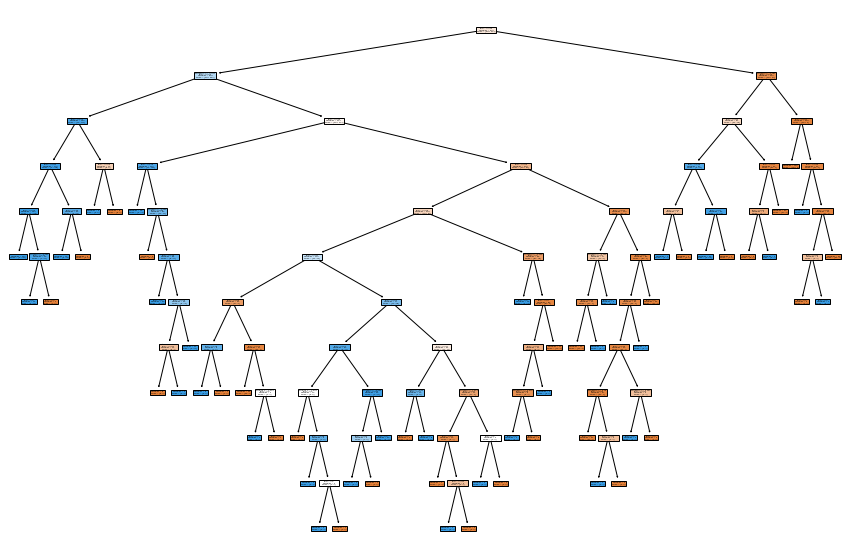

In [8]:
plt.figure(figsize=(15,10))
feature_names=['Variance','Skewness','Curtosis','Entropy']
tree.plot_tree(DT,feature_names=feature_names,filled=True)

### Post pruning decision trees with cost complexity pruning

In [9]:
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [10]:
ccp_alphas

array([0.        , 0.00090678, 0.00097933, 0.00103373, 0.00104784,
       0.00105614, 0.00106223, 0.00106283, 0.00107896, 0.00108089,
       0.00109504, 0.00145085, 0.00158557, 0.00181357, 0.00193447,
       0.00199492, 0.0020856 , 0.00217919, 0.00226696, 0.00317045,
       0.00348205, 0.00362713, 0.00401308, 0.00435515, 0.00476797,
       0.00495928, 0.00535472, 0.00659978, 0.00669624, 0.00677431,
       0.00922246, 0.01641536, 0.01905581, 0.02052929, 0.06724796,
       0.11777495])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_train,accuracy_test=[],[]
for i in ccp_alphas:
    DT_clf=DecisionTreeClassifier(ccp_alpha=i)
    DT_clf.fit(X_train,y_train)
    y_pred_train=DT_clf.predict(X_train)
    y_pred_test=DT_clf.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))

<function matplotlib.pyplot.show(close=None, block=None)>

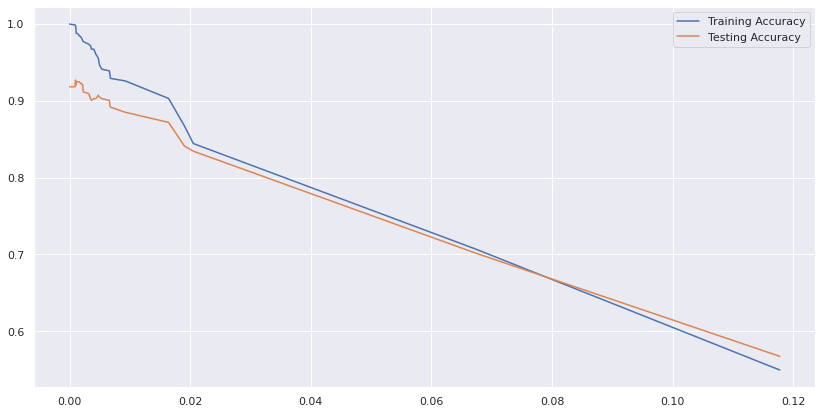

In [12]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=ccp_alphas,label="Training Accuracy")
sns.lineplot(y=accuracy_test,x=ccp_alphas,label="Testing Accuracy ")
plt.show

In [13]:
DT_clf=DecisionTreeClassifier(ccp_alpha=0.006,random_state=42)
DT_clf.fit(X_train,y_train)
y_pred_train=DT_clf.predict(X_train)
y_pred_test=DT_clf.predict(X_test)
print("Training Accuracy=",accuracy_score(y_train,y_pred_train),"\n Testing Accuracy=",accuracy_score(y_test,y_pred_test))

Training Accuracy= 0.941240478781284 
 Testing Accuracy= 0.9028697571743929


[Text(496.0, 509.625, 'Variance <= 5.161\ngini = 0.495\nsamples = 919\nvalue = [505, 414]'),
 Text(279.0, 441.675, 'Skewness <= -0.027\ngini = 0.473\nsamples = 629\nvalue = [242, 387]'),
 Text(155.0, 373.725, 'Curtosis <= 0.851\ngini = 0.121\nsamples = 185\nvalue = [12, 173]'),
 Text(93.0, 305.775, 'gini = 0.045\nsamples = 172\nvalue = [4, 168]'),
 Text(217.0, 305.775, 'Variance <= 0.87\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(155.0, 237.825, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(279.0, 237.825, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(403.0, 373.725, 'Variance <= -5.122\ngini = 0.499\nsamples = 444\nvalue = [230, 214]'),
 Text(341.0, 305.775, 'gini = 0.173\nsamples = 136\nvalue = [13, 123]'),
 Text(465.0, 305.775, 'Skewness <= 3.052\ngini = 0.416\nsamples = 308\nvalue = [217, 91]'),
 Text(403.0, 237.825, 'Variance <= 0.461\ngini = 0.478\nsamples = 208\nvalue = [126, 82]'),
 Text(248.0, 169.875, 'Variance <= -2.285\ngini = 0.487\nsamples = 110\nvalue = 

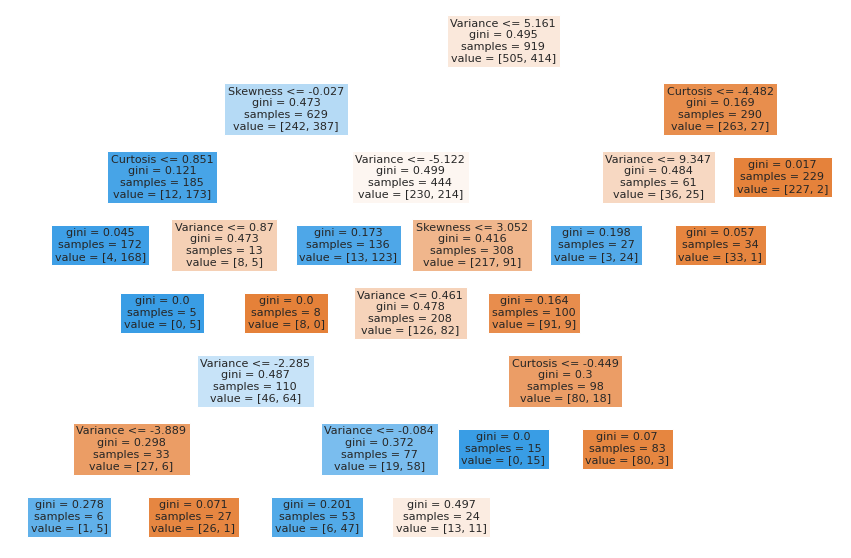

In [14]:
plt.figure(figsize=(15,10))
tree.plot_tree(DT_clf,feature_names=feature_names,filled=True)